In [1]:
import glob
import sys

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

sys.path.append("../../../")

from helpers.experiment import experiment



Commencing Experiment: LogisticRegression_dataset_00_all

PCA pre_processing started
PCA pre_processing completed


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: train_accuracy = 0.679274

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2531  0.7594    0.3797      374  0.4189
  genre_classical     0.9131  0.8612    0.8864     4221  0.8511
    genre_country     0.3171  0.8777    0.4659      327  0.5144
      genre_disco     0.3376  0.9204    0.4940      289  0.5468
     genre_hiphop     0.7480  0.7872    0.7671     1701  0.7409
       genre_jazz     0.6106  0.7518    0.6739     1241  0.6496
      genre_metal     0.5452  0.8977    0.6784      665  0.6850
        genre_pop     0.7307  0.4202    0.5336     4274  0.4548
     genre_reggae     0.6255  0.8287    0.7129      788  0.7047
       genre_rock     0.7649  0.5663    0.6507     3200  0.5940
                                                               
         accuracy                       0.6793    17080  0.6321
        macro avg     0.5846  0.7671    0.624

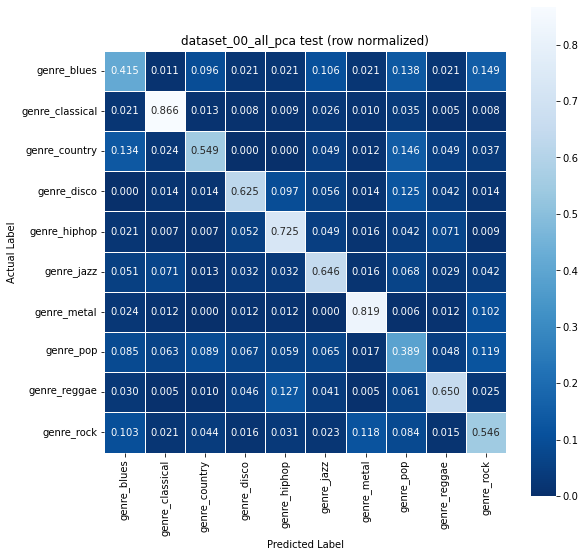



Commencing Experiment: LogisticRegression_dataset_01_mean

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.360363

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0529  0.1631    0.0799      374  0.0570
  genre_classical     0.8047  0.7233    0.7618     4221  0.6907
    genre_country     0.0844  0.4098    0.1400      327  0.1525
      genre_disco     0.0739  0.4256    0.1260      289  0.1452
     genre_hiphop     0.2870  0.1552    0.2014     1701  0.1493
       genre_jazz     0.2572  0.3836    0.3079     1241  0.2478
      genre_metal     0.2430  0.7008    0.3608      665  0.3751
        genre_pop     0.4865  0.1179    0.1898     4274  0.1386
     genre_reggae     0.1791  0.3325    0.2328      788  0.1940
       genre_rock     0.4793  0.2537    0.3318     3200  0.2483
                                                        

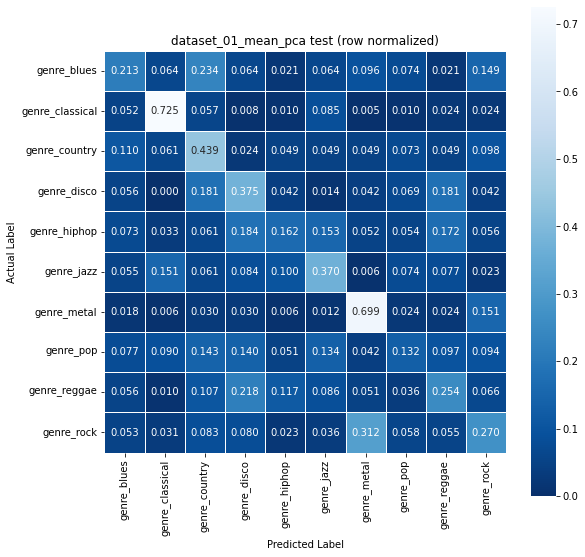



Commencing Experiment: LogisticRegression_dataset_02_mean_cov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.475878

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0934  0.3048    0.1429      374  0.1355
  genre_classical     0.8662  0.7669    0.8135     4221  0.7595
    genre_country     0.1391  0.6024    0.2260      327  0.2632
      genre_disco     0.1237  0.5709    0.2033      289  0.2410
     genre_hiphop     0.5015  0.3968    0.4431     1701  0.3925
       genre_jazz     0.3927  0.5310    0.4515     1241  0.4070
      genre_metal     0.3204  0.7940    0.4565      665  0.4755
        genre_pop     0.5885  0.1827    0.2789     4274  0.2267
     genre_reggae     0.4057  0.6193    0.4902      788  0.4717
       genre_rock     0.5917  0.4012    0.4782     3200  0.3953
                                                    

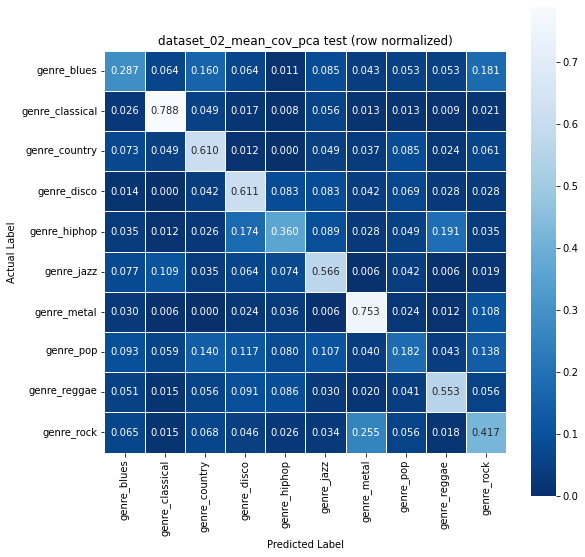



Commencing Experiment: LogisticRegression_dataset_03_mean_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.264871

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0385  0.0802    0.0520      374  0.0248
  genre_classical     0.6441  0.6671    0.6554     4221  0.5398
    genre_country     0.0345  0.2477    0.0606      327  0.0448
      genre_disco     0.0226  0.0450    0.0301      289  0.0083
     genre_hiphop     0.1641  0.0500    0.0766     1701  0.0381
       genre_jazz     0.1947  0.1612    0.1764     1241  0.1190
      genre_metal     0.0991  0.6406    0.1717      665  0.1804
        genre_pop     0.3129  0.0512    0.0881     4274  0.0299
     genre_reggae     0.0909  0.0457    0.0608      788  0.0329
       genre_rock     0.2984  0.1931    0.2345     3200  0.1057
                                                   

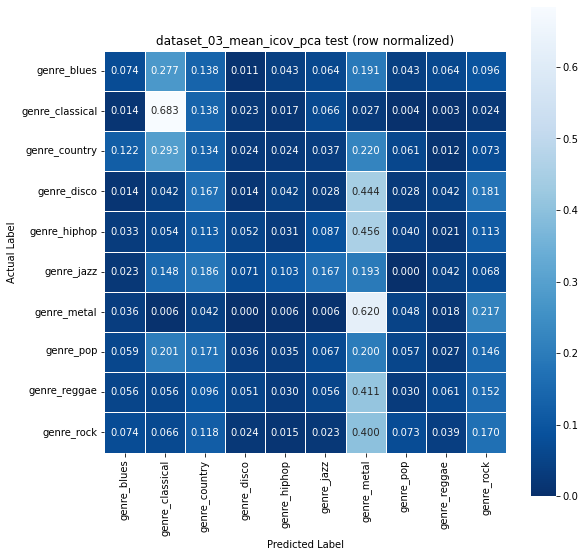



Commencing Experiment: LogisticRegression_dataset_04_mean_cov_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.463993

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0874  0.2888    0.1342      374  0.1251
  genre_classical     0.8655  0.7503    0.8038     4221  0.7486
    genre_country     0.1335  0.6024    0.2185      327  0.2566
      genre_disco     0.1220  0.5536    0.1999      289  0.2349
     genre_hiphop     0.4886  0.3780    0.4263     1701  0.3753
       genre_jazz     0.3912  0.5230    0.4476     1241  0.4025
      genre_metal     0.3008  0.7880    0.4354      665  0.4562
        genre_pop     0.5924  0.1823    0.2788     4274  0.2281
     genre_reggae     0.3917  0.6015    0.4745      788  0.4549
       genre_rock     0.5677  0.3825    0.4571     3200  0.3705
                                               

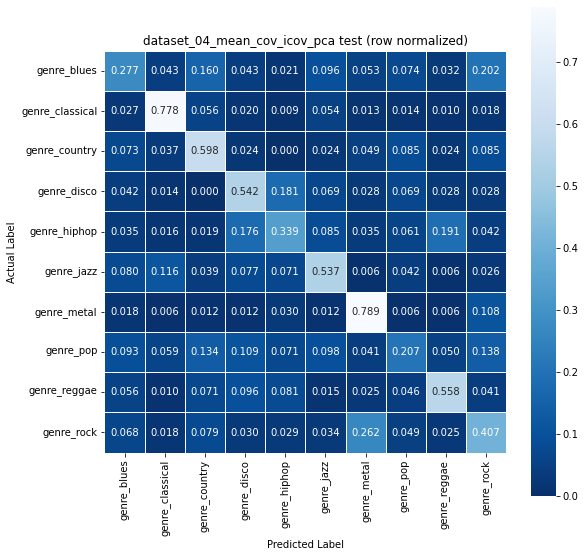



Commencing Experiment: LogisticRegression_dataset_05_pvtt

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.365574

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0414  0.0508    0.0456      374  0.0221
  genre_classical     0.8612  0.7555    0.8049     4221  0.7490
    genre_country     0.0699  0.2508    0.1093      327  0.1006
      genre_disco     0.0518  0.1696    0.0794      289  0.0655
     genre_hiphop     0.2412  0.1570    0.1902     1701  0.1245
       genre_jazz     0.2571  0.3409    0.2931     1241  0.2320
      genre_metal     0.1951  0.7729    0.3116      665  0.3448
        genre_pop     0.5197  0.1324    0.2111     4274  0.1624
     genre_reggae     0.1757  0.4505    0.2528      788  0.2263
       genre_rock     0.3385  0.2437    0.2834     3200  0.1530
                                                        

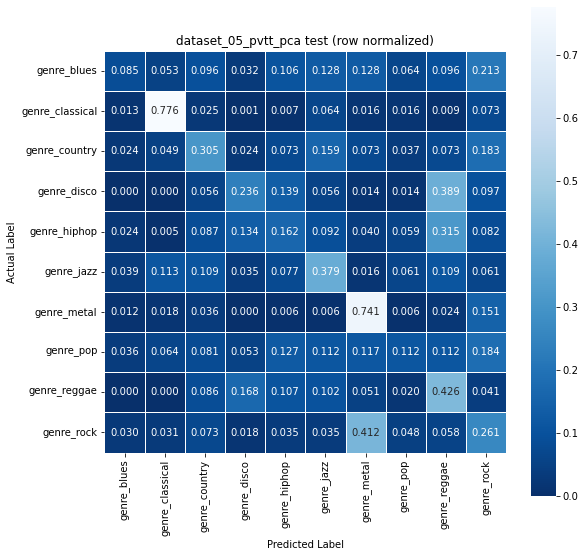



Commencing Experiment: LogisticRegression_dataset_06_pvtt_mean

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.412002

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0529  0.1444    0.0775      374  0.0535
  genre_classical     0.8620  0.7797    0.8188     4221  0.7648
    genre_country     0.0961  0.4006    0.1550      327  0.1654
      genre_disco     0.1014  0.4498    0.1655      289  0.1866
     genre_hiphop     0.3236  0.1558    0.2103     1701  0.1679
       genre_jazz     0.2902  0.4666    0.3578     1241  0.3048
      genre_metal     0.2520  0.7278    0.3743      665  0.3920
        genre_pop     0.5512  0.1460    0.2309     4274  0.1851
     genre_reggae     0.2445  0.4810    0.3242      788  0.2988
       genre_rock     0.5046  0.3438    0.4089     3200  0.3110
                                                   

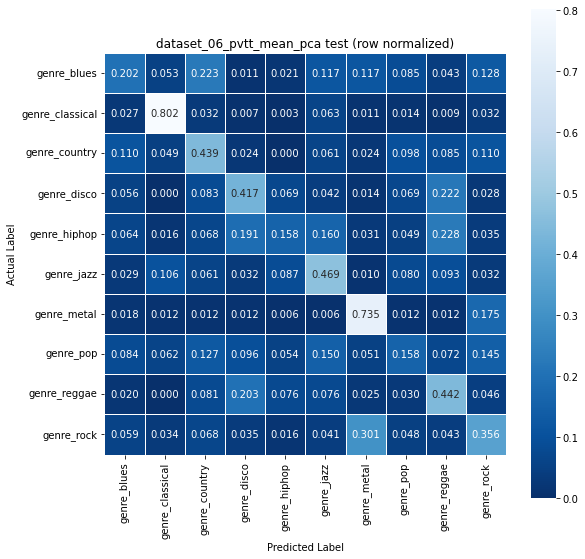



Commencing Experiment: LogisticRegression_dataset_07_pvtt_mean_cov

PCA pre_processing started
PCA pre_processing completed


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: train_accuracy = 0.488817

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0996  0.3235    0.1523      374  0.1469
  genre_classical     0.8835  0.7889    0.8335     4221  0.7851
    genre_country     0.1477  0.6116    0.2380      327  0.2753
      genre_disco     0.1334  0.6159    0.2193      289  0.2629
     genre_hiphop     0.5165  0.4145    0.4599     1701  0.4103
       genre_jazz     0.4086  0.5568    0.4714     1241  0.4291
      genre_metal     0.3141  0.7880    0.4492      665  0.4681
        genre_pop     0.6014  0.1818    0.2792     4274  0.2319
     genre_reggae     0.4174  0.6320    0.5028      788  0.4850
       genre_rock     0.6025  0.4141    0.4908     3200  0.4090
                                                               
         accuracy                       0.4888    17080  0.4287
        macro avg     0.4125  0.5327    0.409

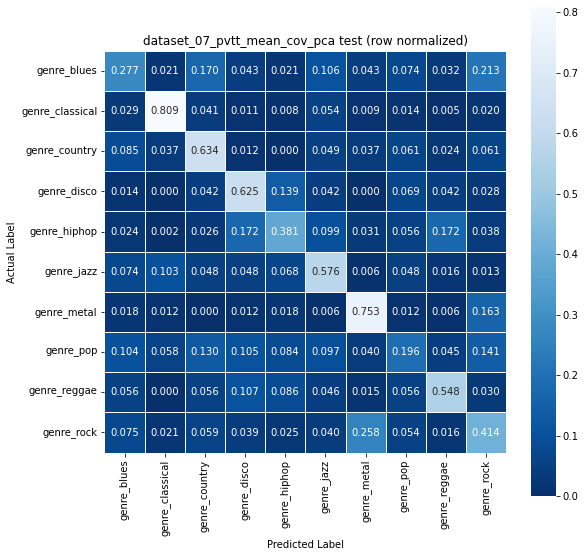



Commencing Experiment: LogisticRegression_dataset_08_pvtt_mean_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.353454

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0310  0.0668    0.0424      374  0.0139
  genre_classical     0.8487  0.7828    0.8144     4221  0.7578
    genre_country     0.0686  0.4037    0.1173      327  0.1287
      genre_disco     0.0651  0.4429    0.1135      289  0.1347
     genre_hiphop     0.2749  0.2222    0.2458     1701  0.1732
       genre_jazz     0.2703  0.3779    0.3152     1241  0.2560
      genre_metal     0.2221  0.7639    0.3442      665  0.3724
        genre_pop     0.4134  0.0447    0.0807     4274  0.0628
     genre_reggae     0.2022  0.1142    0.1460      788  0.1217
       genre_rock     0.3713  0.2537    0.3015     3200  0.1806
                                              

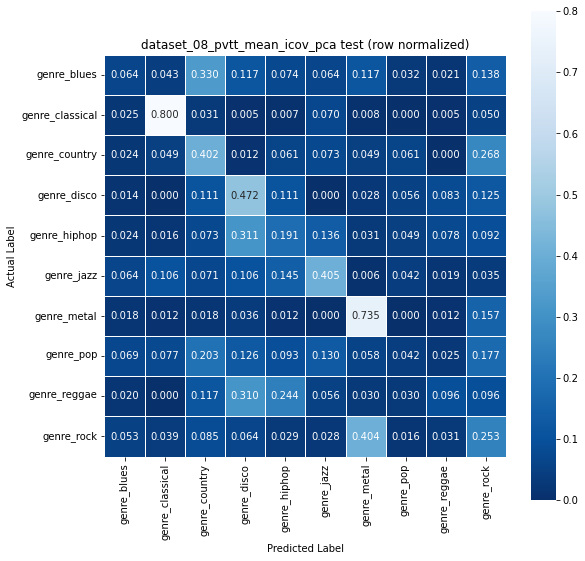



Commencing Experiment: LogisticRegression_dataset_09_pvtt_mean_cov_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.480269

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0902  0.2968    0.1383      374  0.1300
  genre_classical     0.8844  0.7863    0.8325     4221  0.7840
    genre_country     0.1397  0.5902    0.2259      327  0.2609
      genre_disco     0.1257  0.5813    0.2066      289  0.2457
     genre_hiphop     0.4912  0.3792    0.4280     1701  0.3774
       genre_jazz     0.4097  0.5536    0.4709     1241  0.4284
      genre_metal     0.3090  0.7970    0.4454      665  0.4665
        genre_pop     0.5961  0.1778    0.2739     4274  0.2268
     genre_reggae     0.4040  0.6117    0.4866      788  0.4675
       genre_rock     0.5935  0.4088    0.4841     3200  0.4006
                                          

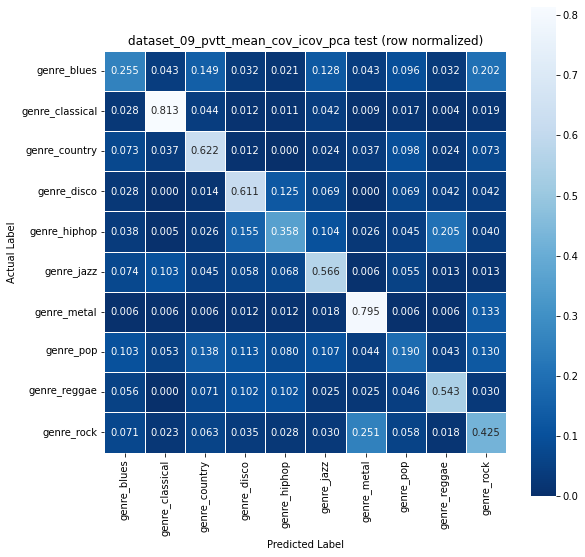



Commencing Experiment: LogisticRegression_dataset_10_melspectrograms_flattened

PCA pre_processing started
PCA pre_processing completed


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: train_accuracy = 0.796546

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.8677  1.0000    0.9292      374  0.9299
  genre_classical     0.8974  0.8410    0.8683     4221  0.8276
    genre_country     0.9424  1.0000    0.9703      327  0.9702
      genre_disco     0.9570  1.0000    0.9780      289  0.9779
     genre_hiphop     0.7188  0.9077    0.8023     1701  0.7843
       genre_jazz     0.7171  0.9807    0.8285     1241  0.8247
      genre_metal     0.7174  1.0000    0.8354      665  0.8402
        genre_pop     0.7697  0.6046    0.6772     4274  0.5932
     genre_reggae     0.7751  0.9975    0.8724      788  0.8730
       genre_rock     0.7821  0.7091    0.7438     3200  0.6895
                                                               
         accuracy                       0.7965    17080  0.7591
        macro avg     0.8145  0.9041    0.850

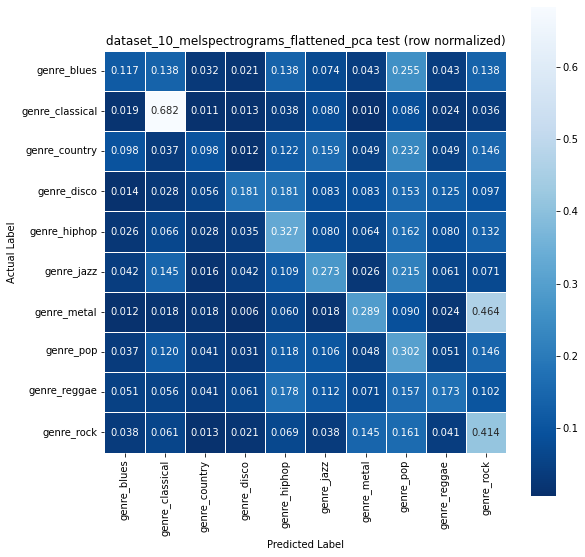

In [2]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

for dataset in datasets:

    if "spectrogram" in dataset:
        n_components = 2400
    else:
        n_components = .95
      
    model = LogisticRegression(
        C=5.0,
        multi_class="auto",
        max_iter=500,
        class_weight="balanced",
    )

    experiment(model, dataset, pca_components=n_components, result_filename="rich_results.json")